In [2]:
import pandas as pd 
import pandas_datareader.data as web
import matplotlib.pyplot as plt 
from matplotlib.finance import candlestick_ohlc
import matplotlib.dates as mdates

In [3]:
import datetime
from datetime import date

In [4]:
start = date(2016,1,1)
end = date(2017,1,20)

In [6]:
stock_price = web.DataReader("TWTR", "google", start, end)

In [7]:
ten_days = stock_price['Close'].resample('10D').ohlc()
stock_volume = stock_price['Volume'].resample('10D').sum()
# stock_volume.tail()
ten_days.tail()

,open,high,low,close
Date,,,,
2016-12-09,19.65,19.65,18.63,18.63
2016-12-19,18.24,18.24,16.39,16.39
2016-12-29,16.39,17.17,16.30,17.17
2017-01-08,17.50,17.50,16.96,16.96
2017-01-18,17.11,17.11,16.58,16.58


In [8]:
ten_days.reset_index(inplace=True)

In [9]:
ten_days.tail()

,Date,open,high,low,close
34,2016-12-09,19.65,19.65,18.63,18.63
35,2016-12-19,18.24,18.24,16.39,16.39
36,2016-12-29,16.39,17.17,16.30,17.17
37,2017-01-08,17.50,17.50,16.96,16.96
38,2017-01-18,17.11,17.11,16.58,16.58


In [10]:
ten_days["Date"] = ten_days["Date"].map(mdates.date2num)

In [11]:
ten_days["Date"].tail()

34    736307.0
35    736317.0
36    736327.0
37    736337.0
38    736347.0
Name: Date, dtype: float64

In [12]:
# creating two figures
price_fig = plt.subplot2grid((6,1),(0,0), rowspan=5, colspan=1)
volume_fig = plt.subplot2grid((6,1),(5,0), rowspan=1, colspan=1, sharex=price_fig)

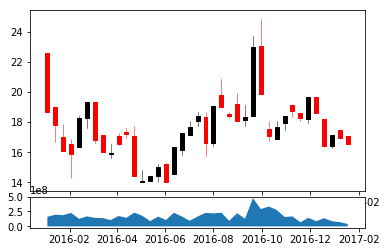

In [13]:
# plotting data
price_fig.xaxis_date()
candlestick_ohlc(price_fig, ten_days.values, width=5)
volume_fig.fill_between(stock_volume.index.map(mdates.date2num), stock_volume.values, 0)

plt.show()